<a href="https://colab.research.google.com/github/SujithSaiSripadam/Deep_Learning/blob/main/Neural_Networks_Logistic_Reg_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Recognizing hand written digits using Neural Networks :(Logistic Regression)**

In [1]:
import torch
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torchvision
import torch.nn as nn
from torch.utils.data import random_split
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn.functional as F

In [2]:
#downloading mnist dataset into root
ds = MNIST(root='data/',download=True)

In [3]:
ds = MNIST(root='data/',download=True,transform = transforms.ToTensor())

In [4]:
len(ds)

60000

In [5]:
#downloading training dataset
test_ds = MNIST(root='data/',train=False,download=True)

In [6]:
#creating validataion and test datasets out of dataset
train_ds , val_ds = random_split(ds,[50000,10000])

In [7]:
len(train_ds)

50000

In [8]:
#shuffling
batch_size = 32
train_dl = DataLoader(train_ds,batch_size ,shuffle= True)
val_dl = DataLoader(val_ds,batch_size)

In [9]:
images , label = ds[0]
print(images.shape)

torch.Size([1, 28, 28])


# **Creating Model**

In [10]:
input_size = 28*28
classes = 10
model = nn.Linear(classes,input_size)

In [11]:
for images, labels in train_dl:
    print(labels)
    print(images.shape)
    break

tensor([2, 2, 5, 2, 6, 5, 2, 5, 3, 0, 8, 5, 0, 2, 4, 4, 9, 2, 6, 3, 0, 1, 4, 9,
        4, 9, 4, 8, 0, 0, 2, 0])
torch.Size([32, 1, 28, 28])


In [12]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

model = MnistModel()

In [13]:
for images, labels in train_dl:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs.shape)
    break

tensor([9, 9, 7, 7, 1, 2, 9, 9, 5, 8, 9, 1, 0, 0, 2, 2, 8, 6, 5, 9, 7, 5, 1, 0,
        1, 1, 3, 1, 0, 7, 2, 1])
torch.Size([32, 1, 28, 28])
torch.Size([32, 10])


# **Error and Accuracy functions**

In [14]:
for images,labels in train_dl :
    print(images.shape)
    outputs = model(images)
    break

torch.Size([32, 1, 28, 28])


In [16]:
probs = F.softmax(outputs,dim=1)
max_probs , preds = torch.max(probs,dim=1)
print("Sample probabilities:\n", probs[0].data)

torch.sum(probs[0]).item()

Sample probabilities:
 tensor([0.0759, 0.1114, 0.0897, 0.1412, 0.1262, 0.1172, 0.0996, 0.0588, 0.0785,
        0.1015])


1.0

In [17]:
torch.sum(preds == labels)

tensor(3)

In [18]:
def accuracy(outputs,labels):
    _,preds = torch.max(outputs,dim=1)
    return torch.tensor(torch.sum(preds == labels).item()/len(probs))

In [19]:
accuracy(outputs,labels)
loss_fn = F.cross_entropy
loss = loss_fn(outputs,labels)

print (accuracy(outputs,labels))

tensor(0.0938)


# ***Training Function***

In [20]:
def fit(epochs, lr, model, train_ds, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    Train = [] # for recording epoch-wise results

    for epoch in range(epochs):

        # Training Phase
        for batch in train_ds:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        Train.append(result)

    return Train

# **Evaluating**

In [21]:
def evaluate(model,val_loader):
    outputs=[model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

# **Extending NN Module**

In [22]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

In [35]:
result0 = evaluate(model, val_dl)
result0

{'val_loss': 0.47753846645355225, 'val_acc': 0.8872803449630737}

In [36]:
Train1 = fit(15, 1, model, train_dl, val_dl)

Epoch [0], val_loss: 0.5207, val_acc: 0.8689
Epoch [1], val_loss: 0.4186, val_acc: 0.9030
Epoch [2], val_loss: 0.5075, val_acc: 0.8816
Epoch [3], val_loss: 0.4266, val_acc: 0.9001
Epoch [4], val_loss: 0.4816, val_acc: 0.8880
Epoch [5], val_loss: 0.4907, val_acc: 0.8816
Epoch [6], val_loss: 0.4554, val_acc: 0.8944
Epoch [7], val_loss: 0.4294, val_acc: 0.9009
Epoch [8], val_loss: 0.4247, val_acc: 0.9030
Epoch [9], val_loss: 0.4802, val_acc: 0.8876
Epoch [10], val_loss: 0.4243, val_acc: 0.9041
Epoch [11], val_loss: 0.5078, val_acc: 0.8838
Epoch [12], val_loss: 0.4766, val_acc: 0.8920
Epoch [13], val_loss: 0.5195, val_acc: 0.8802
Epoch [14], val_loss: 0.4614, val_acc: 0.8929


In [37]:
Train2 = fit(15, 0.01, model, train_dl, val_dl)

Epoch [0], val_loss: 0.3847, val_acc: 0.9142
Epoch [1], val_loss: 0.3804, val_acc: 0.9150
Epoch [2], val_loss: 0.3768, val_acc: 0.9152
Epoch [3], val_loss: 0.3748, val_acc: 0.9149
Epoch [4], val_loss: 0.3722, val_acc: 0.9157
Epoch [5], val_loss: 0.3709, val_acc: 0.9150
Epoch [6], val_loss: 0.3695, val_acc: 0.9143
Epoch [7], val_loss: 0.3680, val_acc: 0.9156
Epoch [8], val_loss: 0.3663, val_acc: 0.9151
Epoch [9], val_loss: 0.3660, val_acc: 0.9147
Epoch [10], val_loss: 0.3645, val_acc: 0.9154
Epoch [11], val_loss: 0.3635, val_acc: 0.9149
Epoch [12], val_loss: 0.3630, val_acc: 0.9159
Epoch [13], val_loss: 0.3623, val_acc: 0.9151
Epoch [14], val_loss: 0.3612, val_acc: 0.9151


In [38]:
Train3 = fit(15, 0.001, model, train_dl, val_dl)

Epoch [0], val_loss: 0.3612, val_acc: 0.9148
Epoch [1], val_loss: 0.3612, val_acc: 0.9146
Epoch [2], val_loss: 0.3612, val_acc: 0.9148
Epoch [3], val_loss: 0.3611, val_acc: 0.9152
Epoch [4], val_loss: 0.3611, val_acc: 0.9150
Epoch [5], val_loss: 0.3610, val_acc: 0.9152
Epoch [6], val_loss: 0.3610, val_acc: 0.9151
Epoch [7], val_loss: 0.3609, val_acc: 0.9151
Epoch [8], val_loss: 0.3608, val_acc: 0.9151
Epoch [9], val_loss: 0.3608, val_acc: 0.9151
Epoch [10], val_loss: 0.3607, val_acc: 0.9151
Epoch [11], val_loss: 0.3606, val_acc: 0.9151
Epoch [12], val_loss: 0.3606, val_acc: 0.9153
Epoch [13], val_loss: 0.3605, val_acc: 0.9151
Epoch [14], val_loss: 0.3605, val_acc: 0.9150


In [27]:
Train4 = fit(15, 0.01, model, train_dl, val_dl)

Epoch [0], val_loss: 0.3093, val_acc: 0.9133
Epoch [1], val_loss: 0.3083, val_acc: 0.9143
Epoch [2], val_loss: 0.3078, val_acc: 0.9152
Epoch [3], val_loss: 0.3076, val_acc: 0.9138
Epoch [4], val_loss: 0.3070, val_acc: 0.9147
Epoch [5], val_loss: 0.3064, val_acc: 0.9147
Epoch [6], val_loss: 0.3060, val_acc: 0.9144
Epoch [7], val_loss: 0.3059, val_acc: 0.9136
Epoch [8], val_loss: 0.3058, val_acc: 0.9142
Epoch [9], val_loss: 0.3054, val_acc: 0.9154
Epoch [10], val_loss: 0.3046, val_acc: 0.9151
Epoch [11], val_loss: 0.3045, val_acc: 0.9150
Epoch [12], val_loss: 0.3039, val_acc: 0.9156
Epoch [13], val_loss: 0.3040, val_acc: 0.9160
Epoch [14], val_loss: 0.3038, val_acc: 0.9152


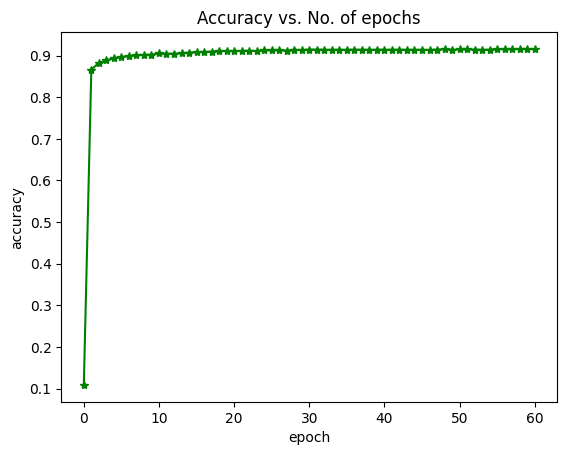

In [33]:
Train = [result0] + Train1 + Train2 + Train3 + Train4 #+ Train5 + Train6 + Train7+ Train8 + Train9
accuracies = [result['val_acc'] for result in Train]
plt.plot(accuracies, '-*',c ='g')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');